<h1>Life Expectancy Prediction</h1>

# Problem Statement:
This project focuses on analyzing the factors affecting life expectancy across 193 countries from 2000 to 2015. The project aims to explore the relationships between various health, economic, social, and environmental factors and their impact on life expectancy. By understanding these relationships, the analysis can offer insights into how different variables, such as immunization rates, healthcare expenditure, mortality rates, and lifestyle factors, influence life expectancy and can guide policy decisions to improve public health outcomes.

# Research Questions

1. What are the most influential factors (e.g., economic, social, health) affecting life expectancy in different countries?

2. How do healthcare-related factors, such as immunization coverage (e.g., Hepatitis B, Polio), and healthcare expenditure, correlate with life expectancy?

3. How do lifestyle factors like alcohol consumption, smoking, and exercise affect life expectancy, and is there a significant difference across countries with lower life expectancy (<65 years)?

# Target Variable

Target Variable: The target variable is Life Expectancy. <br>
Type of Analysis: This is a supervised learning problem since the target is known, and the task is to predict its values based on the input features. 

# Section 1: Exploratory Data Analysis (EDA)

# 1. Import Required Libraries

In [148]:
import pandas as pd
import json
from pandas import json_normalize
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load the Dataset

In [151]:
data_path = r"C:\Users\erdem\Downloads\archive (1)\Life Expectancy Data.csv"
data = pd.read_csv(data_path)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Basic Summary and Data Overview

# Shape of the dataset

In [155]:
print("Shape of the data:", data.shape)

Shape of the data: (2938, 22)


# Data types of each column

In [158]:
print("\nData Types:\n", data.dtypes)




Data Types:
 Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


# Check for missing values

In [161]:
#Handle missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Year                                          0
Life expectancy                               0
Adult Mortality                               0
infant deaths                                 0
Alcohol                                       0
                                             ..
Country_Venezuela (Bolivarian Republic of)    0
Country_Viet Nam                              0
Country_Yemen                                 0
Country_Zambia                                0
Country_Zimbabwe                              0
Length: 212, dtype: int64


# Summary Statistics

In [164]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Histogram

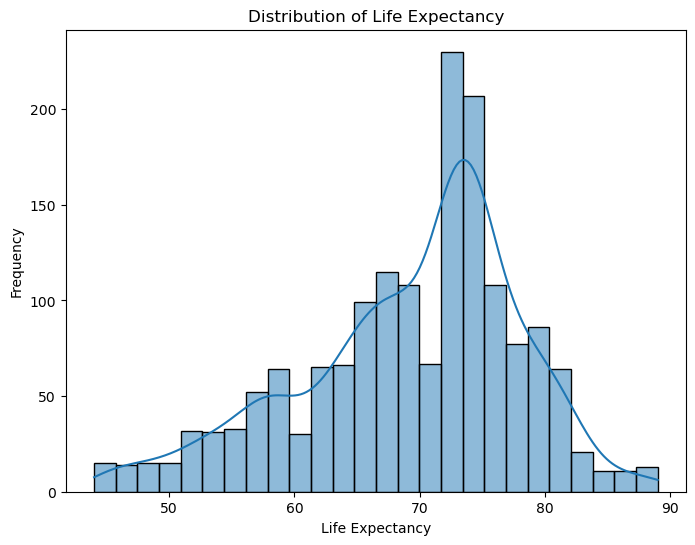

In [167]:
# Histogram for Life Expectancy
# To visualize the distribution of the target variable Life Expectancy 
plt.figure(figsize=(8, 6))
sns.histplot(df['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


# Correlation Heatmap

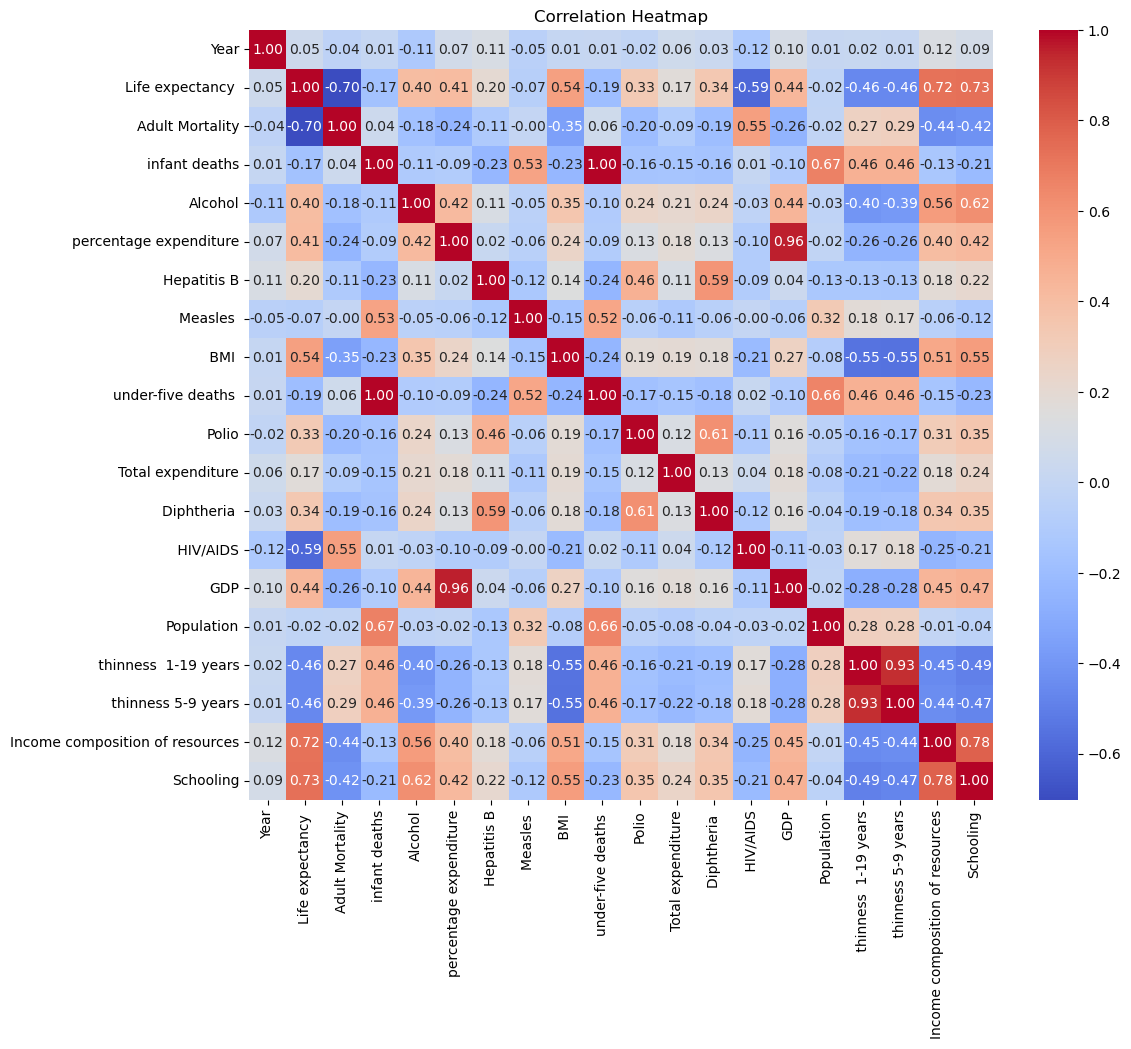

In [170]:
# To visualize correlations between life expectancy and other features.
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Scatter Plots

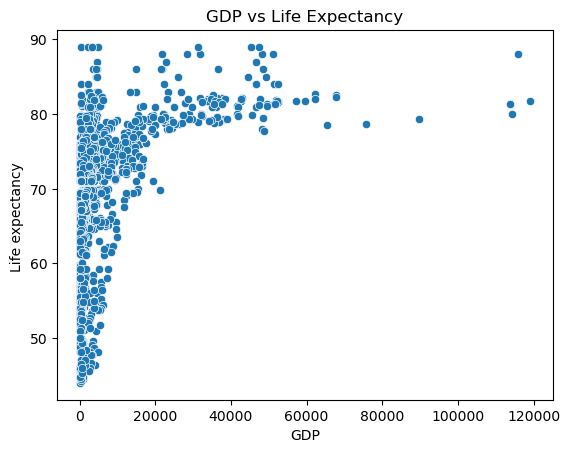

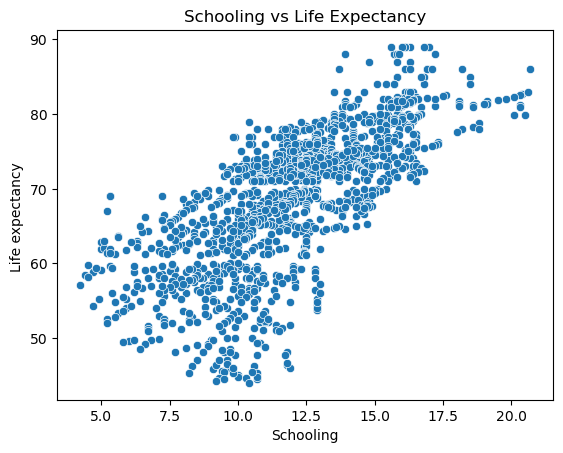

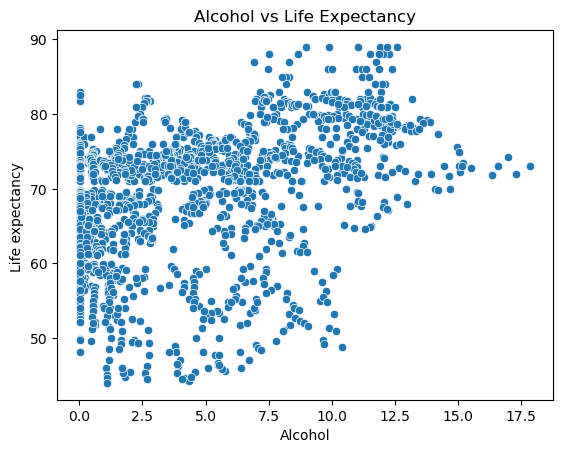

In [173]:
#To visualize the relationship between Life Expectancy and individual features.

#Relation between life expectancy and GDP
sns.scatterplot(data=df, x='GDP', y='Life expectancy ')
plt.title('GDP vs Life Expectancy')
plt.show()

#Relation between life expectancy and Schooling
sns.scatterplot(data=df, x='Schooling', y='Life expectancy ')
plt.title('Schooling vs Life Expectancy')
plt.show()

#Relation between life expectancy and Alcoholism
sns.scatterplot(data=df, x='Alcohol', y='Life expectancy ')
plt.title('Alcohol vs Life Expectancy')
plt.show()

# Pair Plot

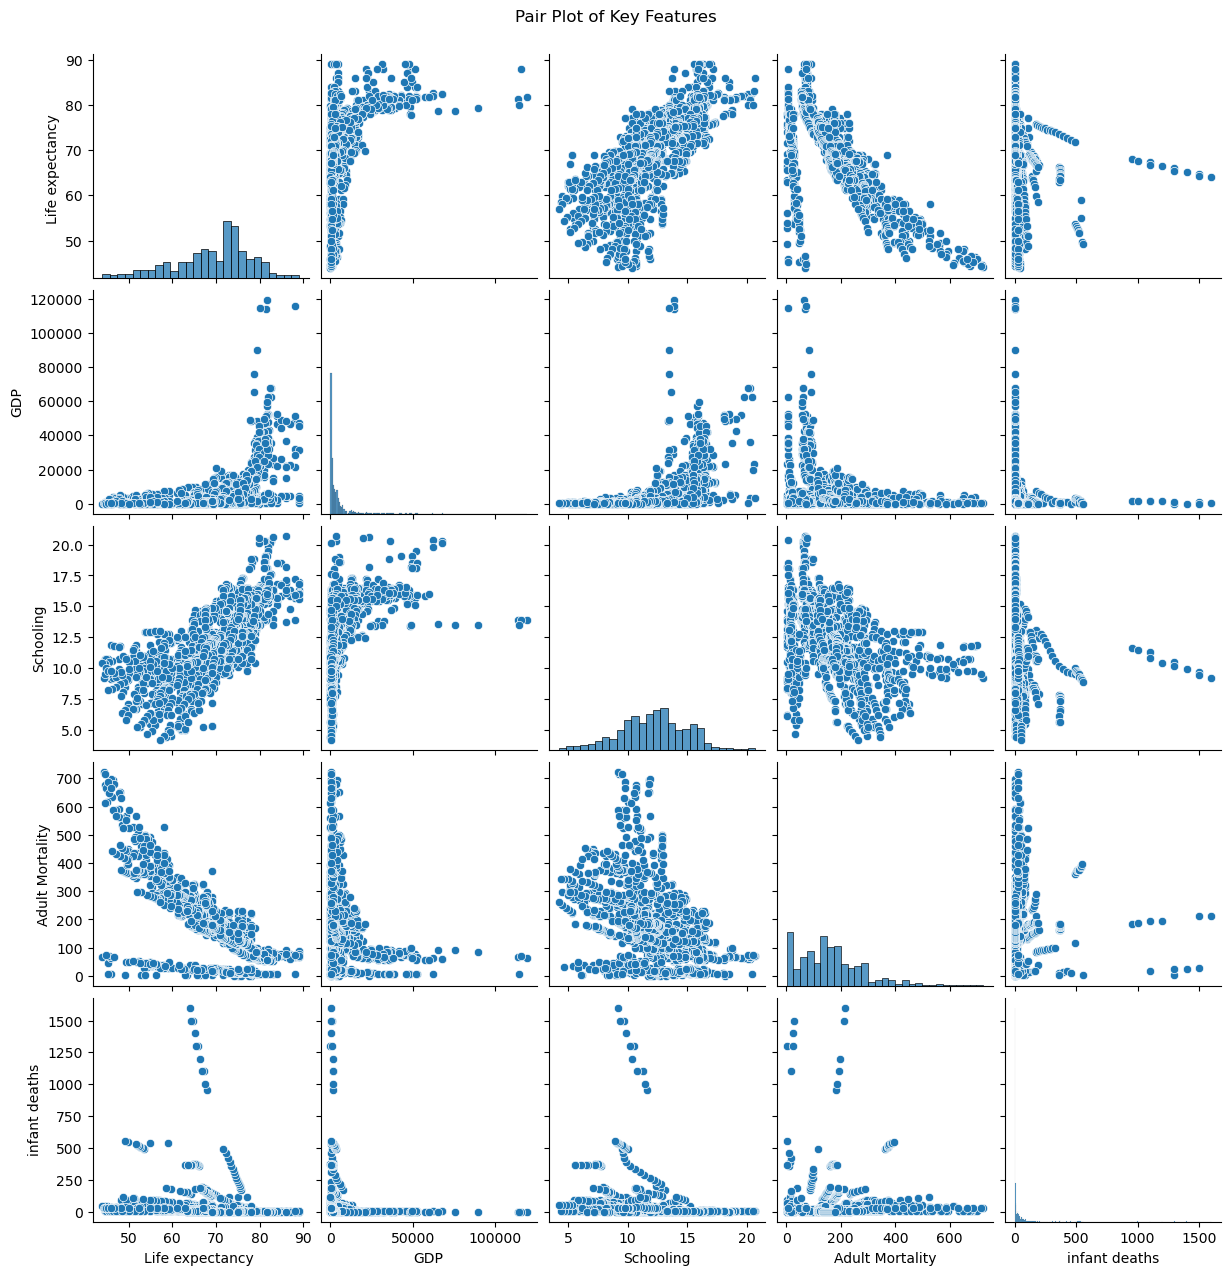

In [197]:
# A pair plot provides a pairwise comparison of all numerical features in the dataset, allowing you to see correlations and relationships between features. This is particularly useful for identifying trends across multiple variables.

# Pair plot to visualize relationships between several numerical features
sns.pairplot(df[['Life expectancy ', 'GDP', 'Schooling', 'Adult Mortality', 'infant deaths']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


# Train the Linear Regression Model

In [208]:
# Checking for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

'''
# Drop the 'Country and Status' column as they contain string values
df = df.drop(columns=['Country'])
df = df.drop(columns=['Status'])
'''

# Drop unnecessary columns
df = df.drop(['Country', 'Status', 'Continent'], axis=1, errors='ignore')  # 'errors="ignore"' ensures that if any column doesn't exist, no error is raised.

# Check which columns are remaining in your dataset
print(df.columns)

# Drop all columns that contain 'Country' or 'Status' in their name (from one-hot encoding)
df = df.drop([col for col in df.columns if 'Country' in col or 'Status' in col or 'Continent' in col], axis=1)

# Select only numeric columns to ensure no categorical features remain
df = df.select_dtypes(include=[float, int])

# Verify the dataframe now contains only numeric columns
print(df.columns)

#Remove rows with any missing values.
df = df.dropna()




# It was needed to remove non-numerical columns as country and status, because we can not compare numerical values with non-numerical values.




# Define features and target
X = df.drop('Life expectancy ', axis=1)  #Drop the target column
y = df['Life expectancy '] #Target column

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)


Index([], dtype='object')
Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


# Extract Coefficients and Create Feature Importance Plot

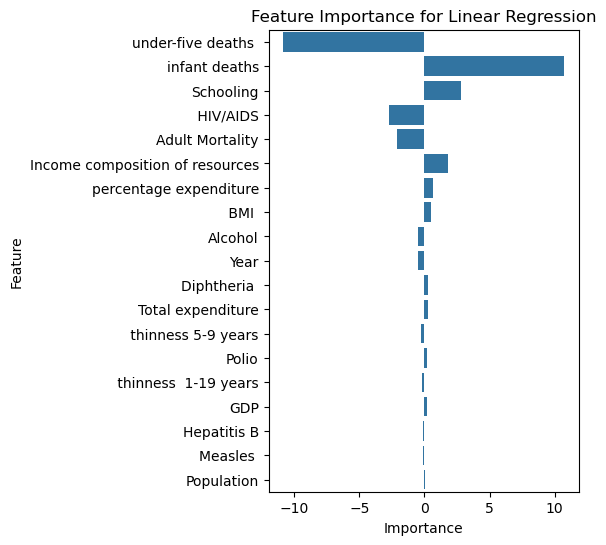

In [247]:
# Get the coefficients from the trained Linear Regression model
coefficients = model.coef_

# Create a DataFrame for coefficients and corresponding feature names
features = X.columns  # Extract feature names from your dataset
importance_df = pd.DataFrame({'Feature': features, 'Importance': coefficients})

# Sort the features by their absolute importance
importance_df['Absolute_Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute_Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(4, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Linear Regression')
plt.show()


# Model Evaluation
After training the model, it's essential to evaluate its performance on the test data.

Evaluate the performance using metrics like:
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R-squared (R²) score

In [213]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 13.071552546181277
Root Mean Squared Error (RMSE): 3.615460212224894
R-squared (R²): 0.8159519109804457


# Cross-Validation
Perform cross-validation to ensure that the model is not overfitting or underfitting.

In [216]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Average Cross-Validation R² Score: {cv_scores.mean()}')


Cross-Validation R² Scores: [0.8506115  0.84960822 0.83562355 0.8341955  0.78317481]
Average Cross-Validation R² Score: 0.8306427155188801


# Residual Analysis
Analyze the residuals (differences between actual and predicted values) to check for any patterns or outliers.

Plot the residuals to see if they are randomly distributed

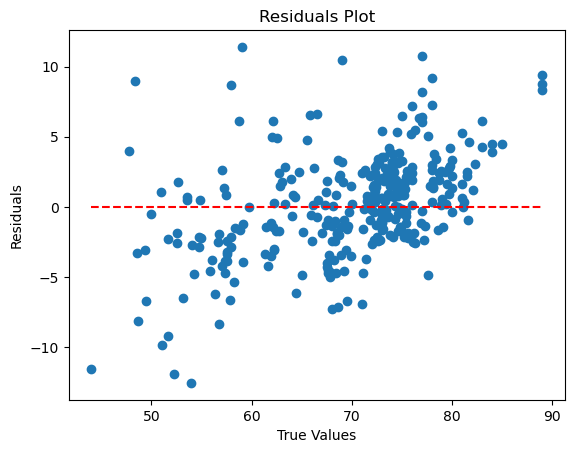

In [221]:
residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


# Compare with Other Models
Trying other regression models to compare performance, such as:

Ridge Regression
Lasso Regression
Random Forest Regressor

Example for Ridge Regression:

In [224]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

# Evaluate Ridge model
mse_ridge = mean_squared_error(y_test, ridge_pred)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, ridge_pred)

print(f'Ridge RMSE: {rmse_ridge}')
print(f'Ridge R²: {r2_ridge}')


Ridge RMSE: 3.6107341235781347
Ridge R²: 0.8164327676451935


# Actual vs. Predicted Life Expectancy

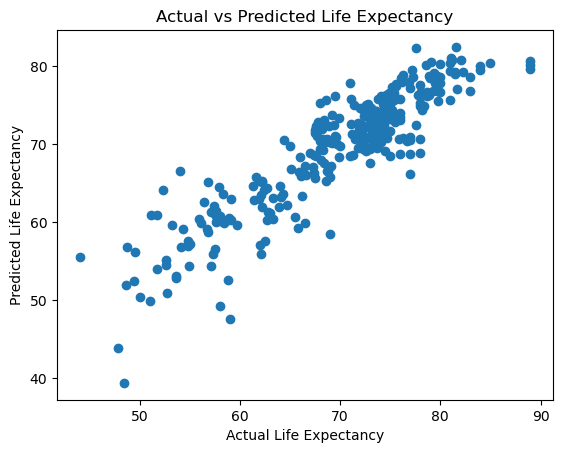

In [235]:
#Create a scatter plot to visualize the actual vs. predicted life expectancy
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()